# Consensus

### Importing libraries

In [1]:
# CODE SOURCE: https://www.kaggle.com/overload10/income-prediction-on-uci-adult-dataset
# Licence Apache 2.0

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


### Loading *csv* file in *dataframe*

In [2]:
df = pd.read_csv("./data/adult_train.csv",1,",")
data = [df]
print (df.head())

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week         country  salary  
0          2174             0              40   United-States   <=50K  

### Convert *salary* to integer

In [3]:
salary_map={' <=50K':1,' >50K':0}
df['salary']=df['salary'].map(salary_map).astype(int)
    
print (df.head(10))

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   
5   37            Private  284582     Masters             14   
6   49            Private  160187         9th              5   
7   52   Self-emp-not-inc  209642     HS-grad              9   
8   31            Private   45781     Masters             14   
9   42            Private  159449   Bachelors             13   

           marital-status          occupation    relationship    race  \
0           Never-married        Adm-clerical   Not-in-family   White   
1      Married-civ-spouse     Exec-managerial         Husband   White   
2                Divorced   Handlers-cleaners   Not-in-family   White   
3     

### convert *sex* into *integer*

In [4]:
df['sex'] = df['sex'].map({' Male':1,' Female':0}).astype(int)

print (df.head(10))
print (("-"*40))
print (df.info())

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   
5   37            Private  284582     Masters             14   
6   49            Private  160187         9th              5   
7   52   Self-emp-not-inc  209642     HS-grad              9   
8   31            Private   45781     Masters             14   
9   42            Private  159449   Bachelors             13   

           marital-status          occupation    relationship    race  sex  \
0           Never-married        Adm-clerical   Not-in-family   White    1   
1      Married-civ-spouse     Exec-managerial         Husband   White    1   
2                Divorced   Handlers-cleaners   Not-in-family   

### Find correlation between columns

In [5]:
def plot_correlation(df, size=15):
    corr= df.corr()
    fig, ax =plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
    plt.show()

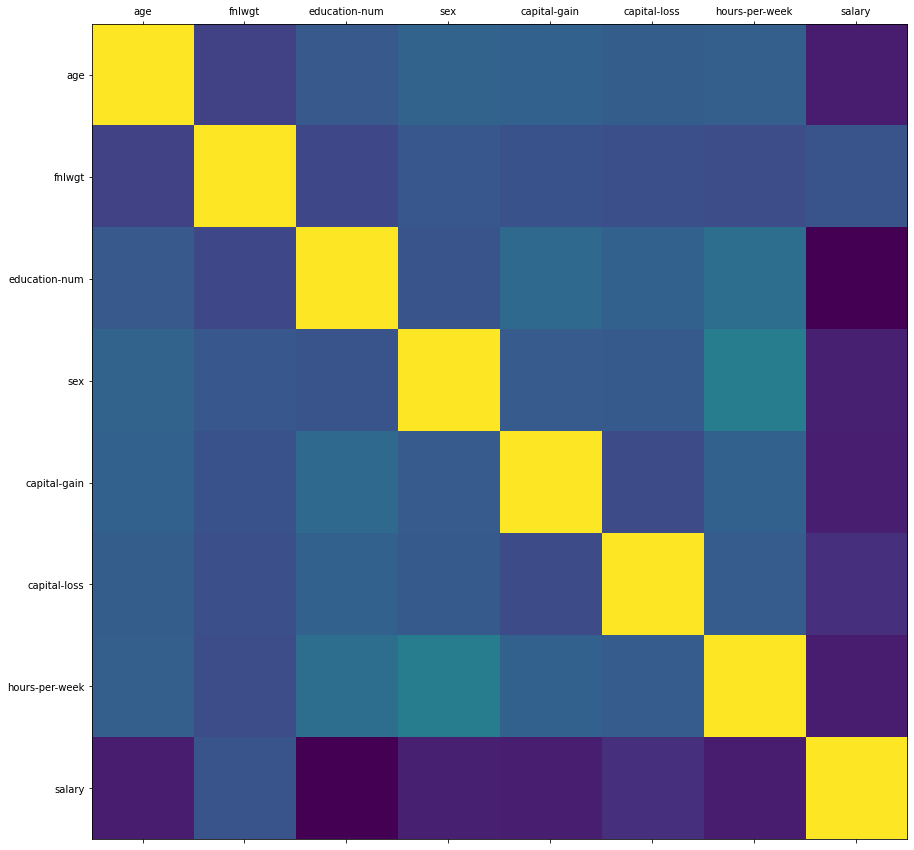

In [6]:
plot_correlation(df)


### Categorise in US and Non-US candidates

In [7]:
print (df[['country','salary']].groupby(['country']).mean())

salary
country                              
 ?                           0.749571
 Cambodia                    0.631579
 Canada                      0.677686
 China                       0.733333
 Columbia                    0.966102
 Cuba                        0.736842
 Dominican-Republic          0.971429
 Ecuador                     0.857143
 El-Salvador                 0.915094
 England                     0.666667
 France                      0.586207
 Germany                     0.678832
 Greece                      0.724138
 Guatemala                   0.953125
 Haiti                       0.909091
 Holand-Netherlands          1.000000
 Honduras                    0.923077
 Hong                        0.700000
 Hungary                     0.769231
 India                       0.600000
 Iran                        0.581395
 Ireland                     0.791667
 Italy                       0.657534
 Jamaica                     0.876543
 Japan                       0.612903
 Laos

### Drop empty value marked as '?'

In [8]:
print (df.shape)
df['country'] = df['country'].replace(' ?',np.nan)
df['workclass'] = df['workclass'].replace(' ?',np.nan)
df['occupation'] = df['occupation'].replace(' ?',np.nan)

df.dropna(how='any',inplace=True)

print (df.shape)
print (df.head(10))

(32561, 15)
(30162, 15)
   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   
5   37            Private  284582     Masters             14   
6   49            Private  160187         9th              5   
7   52   Self-emp-not-inc  209642     HS-grad              9   
8   31            Private   45781     Masters             14   
9   42            Private  159449   Bachelors             13   

           marital-status          occupation    relationship    race  sex  \
0           Never-married        Adm-clerical   Not-in-family   White    1   
1      Married-civ-spouse     Exec-managerial         Husband   White    1   
2                Divorced   Handlers-

In [9]:

for dataset in data:
    dataset.loc[dataset['country'] != ' United-States', 'country'] = 'Non-US'
    dataset.loc[dataset['country'] == ' United-States', 'country'] = 'US'

In [10]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,US,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,US,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,US,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,US,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Non-US,1
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,0,0,0,40,US,1
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,0,0,0,16,Non-US,1
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,45,US,0
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,0,14084,0,50,US,0
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,5178,0,40,US,0


### Convert *country* in *integer*

In [11]:
df['country'] = df['country'].map({'US':1,'Non-US':0}).astype(int)

In [12]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,1,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,1,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,1,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,0,1
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,0,0,0,40,1,1
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,0,0,0,16,0,1
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,45,1,0
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,0,14084,0,50,1,0
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,5178,0,40,1,0


### Data visualisation using histogram

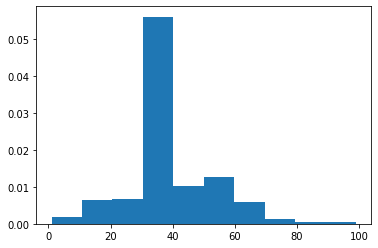

In [13]:
x= df['hours-per-week']
plt.hist(x,bins=None,density=True,histtype='bar')
plt.show()

In [14]:
df[['relationship','salary']].groupby(['relationship']).mean()

,salary
relationship,
Husband,0.544331
Not-in-family,0.893477
Other-relative,0.960630
Own-child,0.985670
Unmarried,0.933686
Wife,0.506401


In [15]:
df[['marital-status','salary']].groupby(['marital-status']).mean()

,salary
marital-status,
Divorced,0.892738
Married-AF-spouse,0.523810
Married-civ-spouse,0.545041
Married-spouse-absent,0.916216
Never-married,0.951676
Separated,0.929712
Widowed,0.903265


### Categorise marital-status into single and couple

In [16]:

df['marital-status'] = df['marital-status'].replace([' Divorced',' Married-spouse-absent',' Never-married',' Separated',' Widowed'],'Single')
df['marital-status'] = df['marital-status'].replace([' Married-AF-spouse',' Married-civ-spouse'],'Couple')

df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Single,Adm-clerical,Not-in-family,White,1,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Couple,Exec-managerial,Husband,White,1,0,0,13,1,1
2,38,Private,215646,HS-grad,9,Single,Handlers-cleaners,Not-in-family,White,1,0,0,40,1,1
3,53,Private,234721,11th,7,Couple,Handlers-cleaners,Husband,Black,1,0,0,40,1,1
4,28,Private,338409,Bachelors,13,Couple,Prof-specialty,Wife,Black,0,0,0,40,0,1
5,37,Private,284582,Masters,14,Couple,Exec-managerial,Wife,White,0,0,0,40,1,1
6,49,Private,160187,9th,5,Single,Other-service,Not-in-family,Black,0,0,0,16,0,1
7,52,Self-emp-not-inc,209642,HS-grad,9,Couple,Exec-managerial,Husband,White,1,0,0,45,1,0
8,31,Private,45781,Masters,14,Single,Prof-specialty,Not-in-family,White,0,14084,0,50,1,0
9,42,Private,159449,Bachelors,13,Couple,Exec-managerial,Husband,White,1,5178,0,40,1,0


In [17]:
df[['marital-status','salary']].groupby(['marital-status']).mean()

,salary
marital-status,
Couple,0.545009
Single,0.931637


In [18]:
df[['marital-status','relationship','salary']].groupby(['marital-status','relationship']).mean()

salary
marital-status relationship             
Couple          Husband         0.544331
                Not-in-family   0.714286
                Other-relative  0.857143
                Own-child       0.821429
                Wife            0.506401
Single          Not-in-family   0.893802
                Other-relative  0.976623
                Own-child       0.988818
                Unmarried       0.933686

In [19]:
df[['marital-status','relationship','salary']].groupby(['relationship','marital-status']).mean()

salary
relationship    marital-status          
 Husband        Couple          0.544331
 Not-in-family  Couple          0.714286
                Single          0.893802
 Other-relative Couple          0.857143
                Single          0.976623
 Own-child      Couple          0.821429
                Single          0.988818
 Unmarried      Single          0.933686
 Wife           Couple          0.506401

In [20]:

df['marital-status'] = df['marital-status'].map({'Couple':0,'Single':1})
   
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,Not-in-family,White,1,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,Husband,White,1,0,0,13,1,1
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,Not-in-family,White,1,0,0,40,1,1
3,53,Private,234721,11th,7,0,Handlers-cleaners,Husband,Black,1,0,0,40,1,1
4,28,Private,338409,Bachelors,13,0,Prof-specialty,Wife,Black,0,0,0,40,0,1
5,37,Private,284582,Masters,14,0,Exec-managerial,Wife,White,0,0,0,40,1,1
6,49,Private,160187,9th,5,1,Other-service,Not-in-family,Black,0,0,0,16,0,1
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,Husband,White,1,0,0,45,1,0
8,31,Private,45781,Masters,14,1,Prof-specialty,Not-in-family,White,0,14084,0,50,1,0
9,42,Private,159449,Bachelors,13,0,Exec-managerial,Husband,White,1,5178,0,40,1,0


In [21]:
rel_map = {' Unmarried':0,' Wife':1,' Husband':2,' Not-in-family':3,' Own-child':4,' Other-relative':5}

df['relationship'] = df['relationship'].map(rel_map)
    
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,White,1,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,White,1,0,0,13,1,1
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,White,1,0,0,40,1,1
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,Black,1,0,0,40,1,1
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,Black,0,0,0,40,0,1
5,37,Private,284582,Masters,14,0,Exec-managerial,1,White,0,0,0,40,1,1
6,49,Private,160187,9th,5,1,Other-service,3,Black,0,0,0,16,0,1
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,2,White,1,0,0,45,1,0
8,31,Private,45781,Masters,14,1,Prof-specialty,3,White,0,14084,0,50,1,0
9,42,Private,159449,Bachelors,13,0,Exec-managerial,2,White,1,5178,0,40,1,0


### Analyse *race*

In [22]:
df[['race','salary']].groupby('race').mean()

,salary
race,
Amer-Indian-Eskimo,0.881119
Asian-Pac-Islander,0.722905
Black,0.870075
Other,0.909091
White,0.736282


In [23]:
race_map={' White':0,' Amer-Indian-Eskimo':1,' Asian-Pac-Islander':2,' Black':3,' Other':4}


df['race']= df['race'].map(race_map)
    
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,1,2174,0,40,1,1
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,1,0,0,13,1,1
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,1,0,0,40,1,1
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,3,1,0,0,40,1,1
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,3,0,0,0,40,0,1
5,37,Private,284582,Masters,14,0,Exec-managerial,1,0,0,0,0,40,1,1
6,49,Private,160187,9th,5,1,Other-service,3,3,0,0,0,16,0,1
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,2,0,1,0,0,45,1,0
8,31,Private,45781,Masters,14,1,Prof-specialty,3,0,0,14084,0,50,1,0
9,42,Private,159449,Bachelors,13,0,Exec-managerial,2,0,1,5178,0,40,1,0


In [24]:
df[['occupation','salary']].groupby(['occupation']).mean()

,salary
occupation,
Adm-clerical,0.866165
Armed-Forces,0.888889
Craft-repair,0.774690
Exec-managerial,0.514780
Farming-fishing,0.883721
Handlers-cleaners,0.938519
Machine-op-inspct,0.875381
Other-service,0.958904
Priv-house-serv,0.993007


In [25]:
df[['workclass','salary']].groupby(['workclass']).mean()

,salary
workclass,
Federal-gov,0.612937
Local-gov,0.705370
Private,0.781208
Self-emp-inc,0.441341
Self-emp-not-inc,0.714286
State-gov,0.731040
Without-pay,1.000000


In [26]:
def f(x):
    if x['workclass'] == ' Federal-gov' or x['workclass']== ' Local-gov' or x['workclass']==' State-gov': return 'govt'
    elif x['workclass'] == ' Private':return 'private'
    elif x['workclass'] == ' Self-emp-inc' or x['workclass'] == ' Self-emp-not-inc': return 'self_employed'
    else: return 'without_pay'
    
    
df['employment_type']=df.apply(f, axis=1)

df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,employment_type
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,1,2174,0,40,1,1,govt
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,1,0,0,13,1,1,self_employed
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,1,0,0,40,1,1,private
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,3,1,0,0,40,1,1,private
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,3,0,0,0,40,0,1,private
5,37,Private,284582,Masters,14,0,Exec-managerial,1,0,0,0,0,40,1,1,private
6,49,Private,160187,9th,5,1,Other-service,3,3,0,0,0,16,0,1,private
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,2,0,1,0,0,45,1,0,self_employed
8,31,Private,45781,Masters,14,1,Prof-specialty,3,0,0,14084,0,50,1,0,private
9,42,Private,159449,Bachelors,13,0,Exec-managerial,2,0,1,5178,0,40,1,0,private


In [27]:
df[['employment_type','salary']].groupby(['employment_type']).mean()

,salary
employment_type,
govt,0.692702
private,0.781208
self_employed,0.632242
without_pay,1.000000


In [28]:
employment_map = {'govt':0,'private':1,'self_employed':2,'without_pay':3}

df['employment_type'] = df['employment_type'].map(employment_map)
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,employment_type
0,39,State-gov,77516,Bachelors,13,1,Adm-clerical,3,0,1,2174,0,40,1,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,0,Exec-managerial,2,0,1,0,0,13,1,1,2
2,38,Private,215646,HS-grad,9,1,Handlers-cleaners,3,0,1,0,0,40,1,1,1
3,53,Private,234721,11th,7,0,Handlers-cleaners,2,3,1,0,0,40,1,1,1
4,28,Private,338409,Bachelors,13,0,Prof-specialty,1,3,0,0,0,40,0,1,1
5,37,Private,284582,Masters,14,0,Exec-managerial,1,0,0,0,0,40,1,1,1
6,49,Private,160187,9th,5,1,Other-service,3,3,0,0,0,16,0,1,1
7,52,Self-emp-not-inc,209642,HS-grad,9,0,Exec-managerial,2,0,1,0,0,45,1,0,2
8,31,Private,45781,Masters,14,1,Prof-specialty,3,0,0,14084,0,50,1,0,1
9,42,Private,159449,Bachelors,13,0,Exec-managerial,2,0,1,5178,0,40,1,0,1


In [29]:
df[['education','salary']].groupby(['education']).mean()

,salary
education,
10th,0.928049
11th,0.943702
12th,0.923077
1st-4th,0.960265
5th-6th,0.958333
7th-8th,0.937163
9th,0.945055
Assoc-acdm,0.746032
Assoc-voc,0.736802


In [30]:
df.drop(labels=['workclass','education','occupation'],axis=1,inplace=True)
df.head(10)

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,employment_type
0,39,77516,13,1,3,0,1,2174,0,40,1,1,0
1,50,83311,13,0,2,0,1,0,0,13,1,1,2
2,38,215646,9,1,3,0,1,0,0,40,1,1,1
3,53,234721,7,0,2,3,1,0,0,40,1,1,1
4,28,338409,13,0,1,3,0,0,0,40,0,1,1
5,37,284582,14,0,1,0,0,0,0,40,1,1,1
6,49,160187,5,1,3,3,0,0,0,16,0,1,1
7,52,209642,9,0,2,0,1,0,0,45,1,0,2
8,31,45781,14,1,3,0,0,14084,0,50,1,0,1
9,42,159449,13,0,2,0,1,5178,0,40,1,0,1


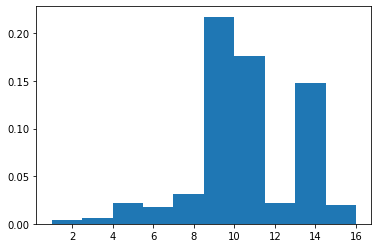

In [31]:
x= df['education-num']
plt.hist(x,bins=None,density=True,histtype='bar')
plt.show()

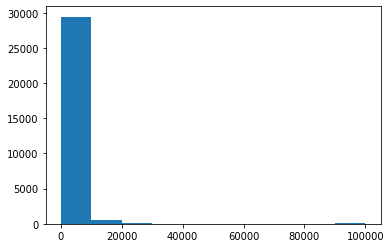

In [32]:
x=df['capital-gain']
plt.hist(x,bins=None)
plt.show()

In [33]:
df.loc[(df['capital-gain'] > 0),'capital-gain'] = 1
df.loc[(df['capital-gain'] == 0 ,'capital-gain')]= 0

In [34]:
df.head(25)

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,employment_type
0,39,77516,13,1,3,0,1,1,0,40,1,1,0
1,50,83311,13,0,2,0,1,0,0,13,1,1,2
2,38,215646,9,1,3,0,1,0,0,40,1,1,1
3,53,234721,7,0,2,3,1,0,0,40,1,1,1
4,28,338409,13,0,1,3,0,0,0,40,0,1,1
5,37,284582,14,0,1,0,0,0,0,40,1,1,1
6,49,160187,5,1,3,3,0,0,0,16,0,1,1
7,52,209642,9,0,2,0,1,0,0,45,1,0,2
8,31,45781,14,1,3,0,0,1,0,50,1,0,1
9,42,159449,13,0,2,0,1,1,0,40,1,0,1


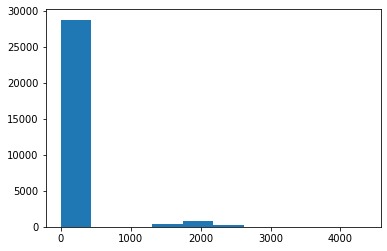

In [35]:
x=df['capital-loss']
plt.hist(x,bins=None)
plt.show()

In [36]:
df.loc[(df['capital-loss'] > 0),'capital-loss'] = 1
df.loc[(df['capital-loss'] == 0 ,'capital-loss')]= 0

df.head(10)

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,employment_type
0,39,77516,13,1,3,0,1,1,0,40,1,1,0
1,50,83311,13,0,2,0,1,0,0,13,1,1,2
2,38,215646,9,1,3,0,1,0,0,40,1,1,1
3,53,234721,7,0,2,3,1,0,0,40,1,1,1
4,28,338409,13,0,1,3,0,0,0,40,0,1,1
5,37,284582,14,0,1,0,0,0,0,40,1,1,1
6,49,160187,5,1,3,3,0,0,0,16,0,1,1
7,52,209642,9,0,2,0,1,0,0,45,1,0,2
8,31,45781,14,1,3,0,0,1,0,50,1,0,1
9,42,159449,13,0,2,0,1,1,0,40,1,0,1


In [37]:
df['age'].count()

30162

## Applying model for learning

### Divide data in training, validation and test dataset

#### 50% training data, 20% validation data, 30% test data

In [38]:

from sklearn.model_selection import train_test_split

X= df.drop(['salary'],axis=1)
y=df['salary']

split_size=0.3

#Creation of Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=split_size,random_state=22)

#Creation of Train and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=5)

In [39]:
print ("Train dataset: {0}{1}".format(X_train.shape, y_train.shape))
print ("Validation dataset: {0}{1}".format(X_val.shape, y_val.shape))
print ("Test dataset: {0}{1}".format(X_test.shape, y_test.shape))

Train dataset: (16890, 12)(16890,)
Validation dataset: (4223, 12)(4223,)
Test dataset: (9049, 12)(9049,)


### Let's select few algorithm used for classification

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [41]:
models = []
names = ['LR','Random Forest','Neural Network','GaussianNB','DecisionTreeClassifier','SVM',]

# models.append((LogisticRegression()))
models.append((RandomForestClassifier(n_estimators=100)))
# models.append((MLPClassifier()))
# models.append((GaussianNB()))
# models.append((DecisionTreeClassifier()))
# models.append((SVC()))

In [42]:
print (models)

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)]


In [43]:
from sklearn import model_selection
from sklearn.metrics import accuracy_score

In [44]:

kfold = model_selection.KFold(n_splits=5,random_state=7)

for i in range(0,len(models)):    
    cv_result = model_selection.cross_val_score(models[i],X_train,y_train,cv=kfold,scoring='accuracy')
    score=models[i].fit(X_train,y_train)
    prediction = models[i].predict(X_val)
    acc_score = accuracy_score(y_val,prediction)     
    print ('-'*40)
    print ('{0}: {1}'.format(names[i],acc_score))
    

----------------------------------------
LR: 0.8221643381482359


##### Let's proceed further with Random Forest algorithm as it showed good accuracy

#### Let's predict our test data and see prediction results

In [45]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.inspection import plot_partial_dependence


In [46]:
X_train

,age,fnlwgt,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,employment_type
9501,61,56009,10,0,2,0,1,0,0,40,1,1
18363,21,143604,9,1,4,0,0,0,0,40,1,1
31990,46,250821,15,0,2,0,1,1,0,40,1,0
9809,50,34233,9,0,2,0,1,0,0,50,1,1
15058,25,81286,9,0,2,0,1,0,0,45,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6805,35,28572,10,0,2,0,1,1,0,35,1,1
15574,74,91488,2,0,2,3,1,0,0,20,1,1
10823,23,82497,10,1,4,0,0,0,0,28,1,1
610,52,200853,14,1,3,0,0,1,0,60,1,1


In [47]:
randomForest = RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)
prediction = randomForest.predict(X_test)

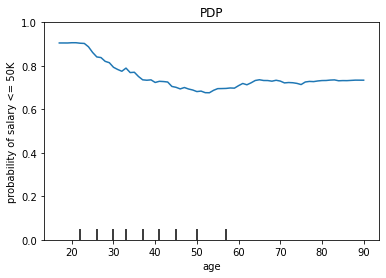

In [48]:
plot_partial_dependence(randomForest, X_train, ['age'])

plt.title('PDP')
plt.ylabel("probability of salary <= 50K")
plt.ylim(0,1)

plt.show()



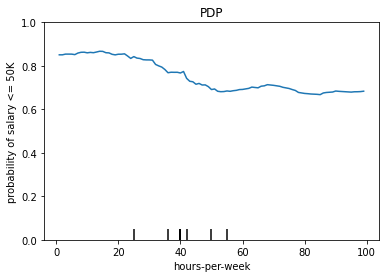

In [49]:
plot_partial_dependence(randomForest, X_train, ['hours-per-week'])

plt.title('PDP')
plt.ylabel("probability of salary <= 50K")
plt.ylim(0,1)

plt.show()

In [50]:
print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test,prediction))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,prediction))
print ('-'*40)
print ('Classification Matrix:')
print (classification_report(y_test,prediction))

----------------------------------------
Accuracy score:
0.8216377500276274
----------------------------------------
Confusion Matrix:
[[1309  934]
 [ 680 6126]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.66      0.58      0.62      2243
           1       0.87      0.90      0.88      6806

    accuracy                           0.82      9049
   macro avg       0.76      0.74      0.75      9049
weighted avg       0.82      0.82      0.82      9049

